In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Data Collection

In [3]:
df=pd.read_csv('Housing.csv')
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


# Data Exploration

In [4]:
df.shape

(545, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# Data Cleaning

In [6]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [8]:
# Basic statistics of the dataset
print("\nDataset statistics:")
print(df.describe())


Dataset statistics:
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [9]:
# Check data types
print("\nData types:")
print(df.dtypes)


Data types:
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [15]:
# Handle missing values
# Fill numeric columns with their median
numeric_columns = df.select_dtypes(include='number').columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Fill non-numeric columns with their most frequent value (mode)
non_numeric_columns = df.select_dtypes(include=['object', 'category']).columns
for column in non_numeric_columns:
    if df[column].isnull().any():
        df[column].fillna(df[column].mode()[0], inplace=True)

# Drop irrelevant columns if any
# Example: df.drop(columns=['Column_Name'], inplace=True)

# Feature Selection


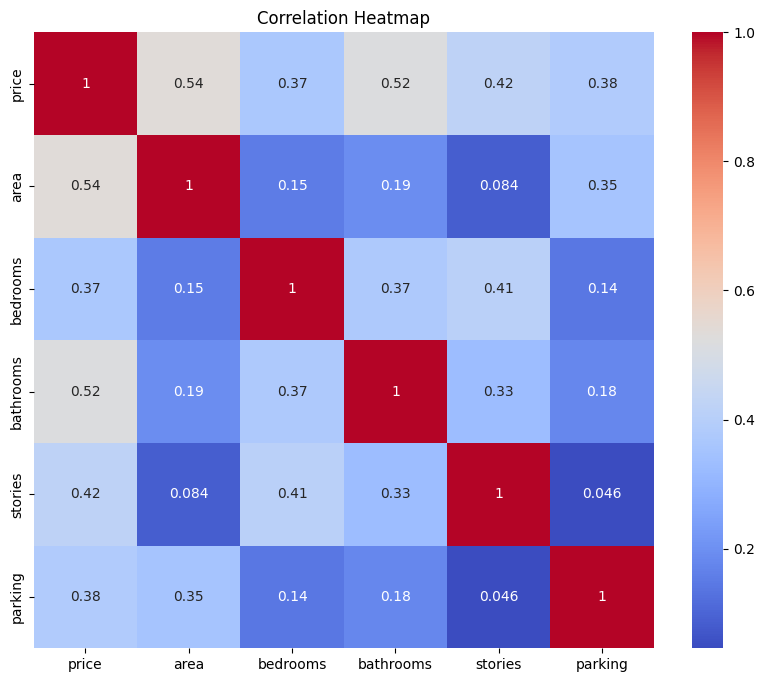

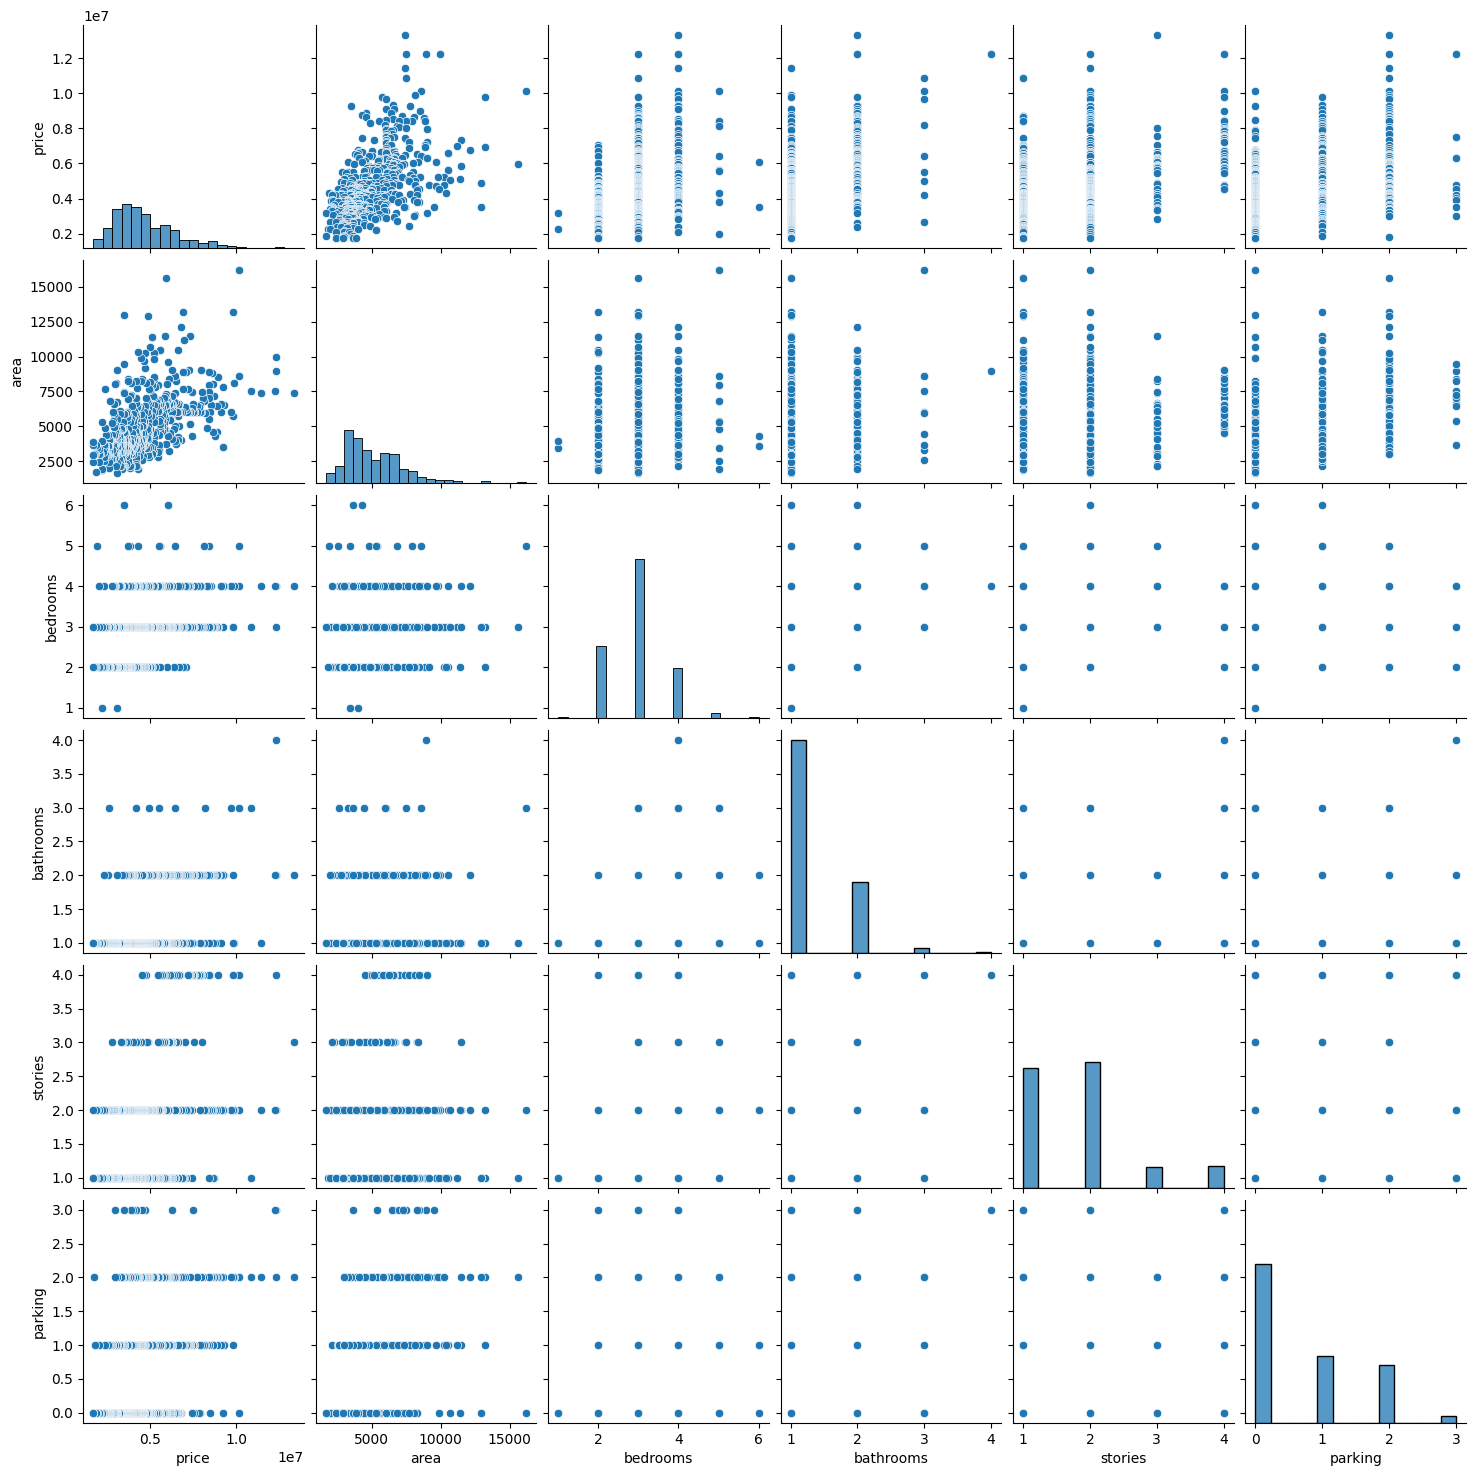

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap (only for numeric columns)
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include='number')  # Select numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot (handling categorical columns if needed)
sns.pairplot(df.select_dtypes(include=['number', 'category']))  # Include numeric and category columns
plt.show()


In [19]:
# Features (independent variables)
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]

# Target variable (dependent variable)
y = df['price']


# Model Training and Evaluation

In [26]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [27]:
# Predict on the test set
y_pred = model.predict(X_test)



In [25]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Model Evaluation:
Mean Squared Error (MSE): 2292721545725.3613
R-squared (R²): 0.5464062355495873


# DATA VISUALIZATION

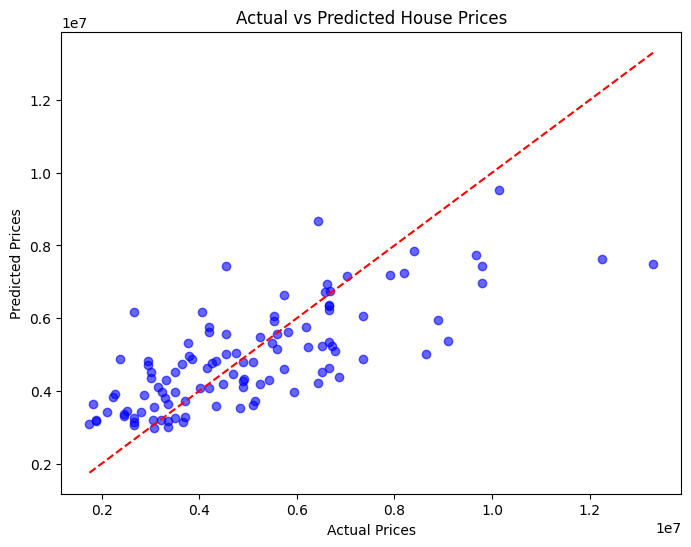

In [28]:
# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


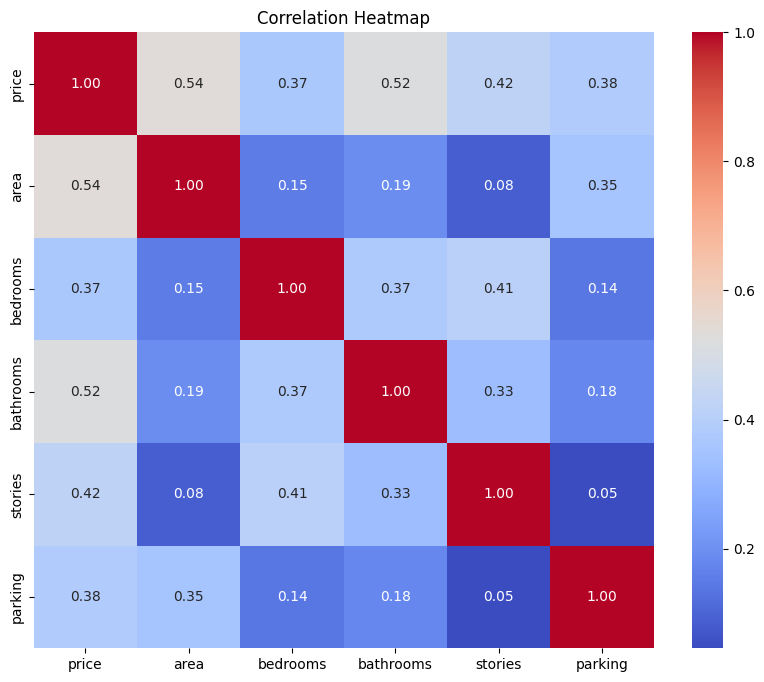

In [30]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Visualization: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


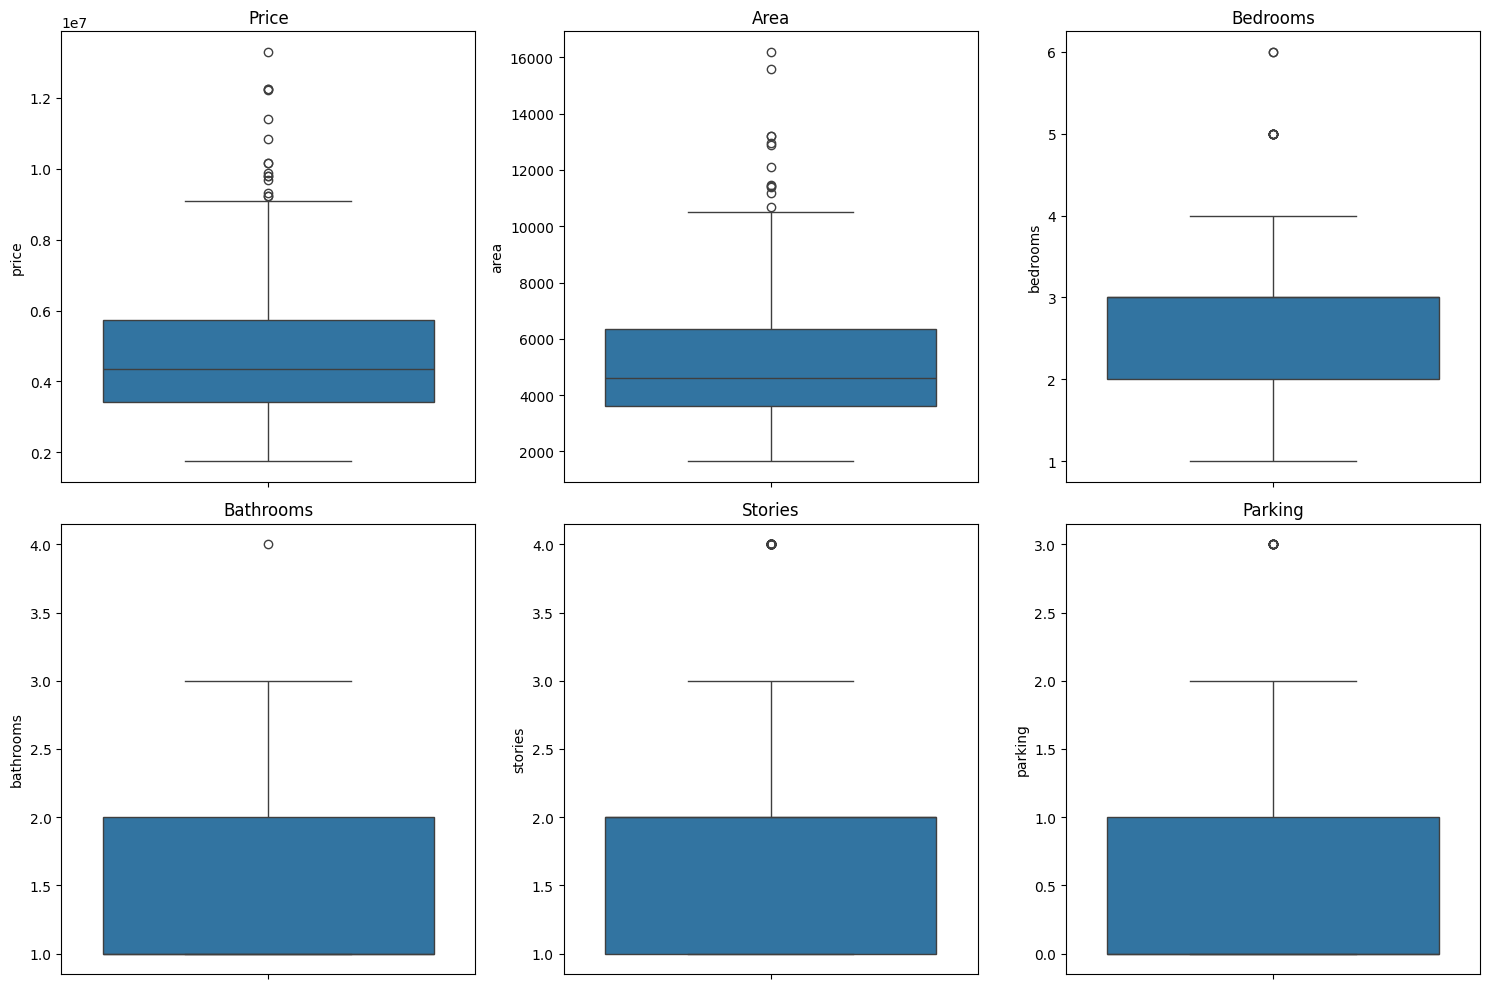

In [31]:
# Boxplots for Outlier Analysis
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
sns.boxplot(df['price'], ax=axs[0, 0]).set_title('Price')
sns.boxplot(df['area'], ax=axs[0, 1]).set_title('Area')
sns.boxplot(df['bedrooms'], ax=axs[0, 2]).set_title('Bedrooms')
sns.boxplot(df['bathrooms'], ax=axs[1, 0]).set_title('Bathrooms')
sns.boxplot(df['stories'], ax=axs[1, 1]).set_title('Stories')
sns.boxplot(df['parking'], ax=axs[1, 2]).set_title('Parking')
plt.tight_layout()
plt.show()